In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import means
from means.examples import *

In [3]:
import numpy as np


In [4]:
import sympy

In [5]:
model = MODEL_P53

In [6]:
# Values used in Ale et al.
constant_values = [90, 0.002, 1.7, 1.1, 0.93, 0.96, 0.01] 
initial_conditions = [70, 30, 60]

In [7]:
# Note that the scarcer timepoints won't effect simulation results, 
# however the plotted results will look worse as the data won't be plotted for the values in between
timepoints = np.arange(0, 40, 0.1)

In [8]:
problems = []
for max_order in range(1, 5):
    problem = means.mea_approximation(model, max_order)
    problems.append(problem)

In [9]:
results = []
for problem in problems:
    simulator = means.simulation.Simulation(problem)
    trajectories = simulator.simulate_system(constant_values, initial_conditions, timepoints)
    results.append(trajectories)


Could not find GLIMDA


In [10]:
from matplotlib import pyplot as plt

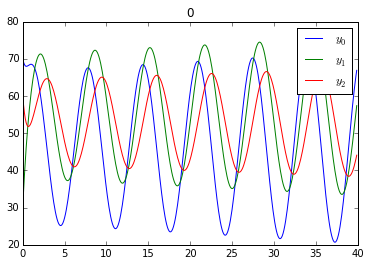

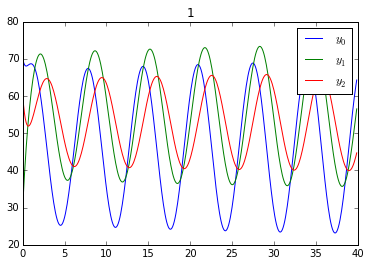

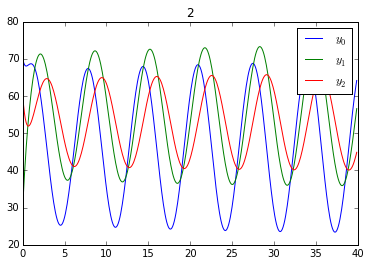

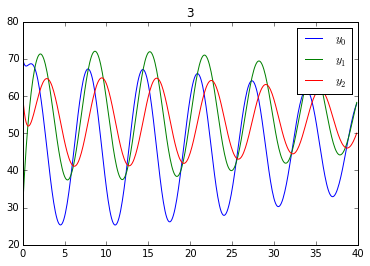

In [11]:
figure_ids = {}
figure_id_counter = 0
for i, trajectories in enumerate(results):
    plt.figure()
    plt.title(i)
    for trajectory in trajectories:
        try:
            moment_order = trajectory.description.order
        except AttributeError:
            if isinstance(trajectory.description, Moment):
                raise
            else:
                continue
        if moment_order > 1:
            continue
        description = trajectory.description
        trajectory.plot()
    plt.legend()    

In [12]:
plt.close()